# Dimensionality Reduction

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

# Principal Component Analysis

- Fit lines(vectors) to given data
    - `n` lines for `n` dimensions
- Each subsequent line orthogonal in direction to all previous ones
- Each of these lines: Principal Components
- Pick the first `p` of these 'n' lines
- Dimensions reduced from `n` to `p`
    - With some loss of information
    - How is the data spread i.e. variability

# Visualizing Principal Components

# Instructions

- To be able to visualize Principal Components, we create random 2-D data below
- We then put these 2-D data points on a scatter plot
- Observe the trend that the data shows (PCA uses this to define the Principal Components)

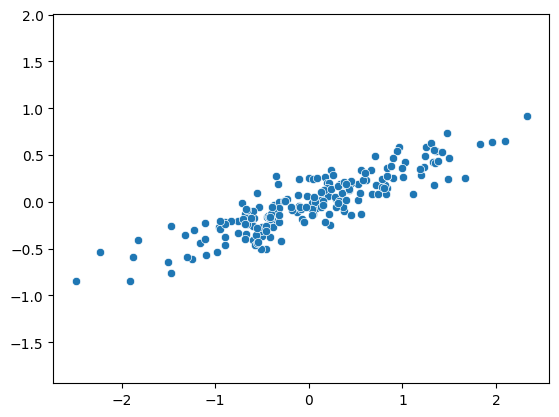

In [3]:
np.random.seed(1)
mul = np.random.random(size=(2, 2))
rnd = np.random.normal(size=(2, 200))
X = np.dot(mul, rnd).T
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.axis('equal');

# Applying PCA

In [4]:
from sklearn.decomposition import PCA

# Exercise 1

1. Create a `PCA` object. Since we want to retain both dimensions right now, pass the argument `n_components` as 2

In [5]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

# Exercise 2

1. Fit the data `X` to the model
2. We use the `components` and `explained_variance` from this fitted model in the visualization next. Extract these two from the model into the corresponding variables below
3. Also calculate the `explained_variance_ratio` which is a fractional part between 0 and 1 and indicates the contribution of the corresponding component to the variance. Notice that that contribution of the first component is almost 0.98 or 98%
4. Observe in the plot that the princpal components are along the major trend directions of the data, and are orthogonal (perpendicular) to each other

In [6]:
# Fit
pca.fit(X)

PCA(n_components=2)

In [7]:
components = pca.components_
components

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [8]:
explained_variance = pca.explained_variance_
explained_variance

array([0.7625315, 0.0184779])

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.97634101, 0.02365899])

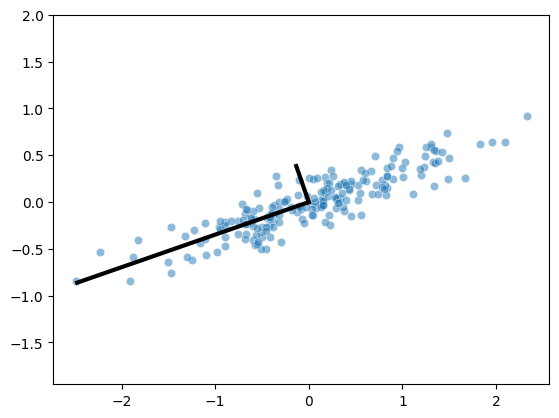

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.5)
for length, vector in zip(explained_variance, components):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], color='black', linewidth=3)
plt.axis('equal');

# Reducing Dimensions

# Exercise 3

Now, we perform the actual dimension reduction.
1. Create another `PCA` model that will cover at least 95% (i.e. 0.95) of the explained variance (You would need to pass this value as the argument when creating the model)
2. Pass the `X` data to the model to fit and transform into the dimension-reduced data, `X_trans`
3. Check the shapes of both data and confirm the dimension reduction

In [ ]:
pca = PCA(n_components=0.95)
X_trans = pca.fit_transform(X)

print(X.shape)
print(X_trans.shape)

# Exercise 4

We now try to visualize the transformed data along with the original one. For this we'll need to interpolate the transformed data back into 2 dimensions
1. Use the `inverse_transform()` method of the model to convert 1-dim `X_trans` to the 2-D equivalent, `X_new`
2. You will be able to clearly onserve now that the tranformed data is spread out only the first Principal Component and not the second
3. Calculate the `explained_variance_ratio` of this model. Notice that it does explain more than the 95% of the variance we had asked it to

In [ ]:
X_new = pca.inverse_transform(X_trans)

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.2)
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

# End